In [1]:
import os
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import numpy as np
import ipywidgets
import tqdm
from simulation.sfh_in_box import sfh, plot_sfh, plot_binned_sfh
from data_pd.dump_features import dump_features
from astropy import constants as c
from astropy.table import Table
from simulation.luminosity import surface_brightness, color_plot
from simulation.angmom import sideon

In [2]:
!ls profiles

62p100prof_dens.fits	62p50prof_v_circ.fits	71p100prof_sb.fits
62p100prof_sb.fits	69p100prof_dens.fits	71p100prof_v_circ.fits
62p100prof_v_circ.fits	69p100prof_sb.fits	71p150prof_dens.fits
62p150prof_dens.fits	69p100prof_v_circ.fits	71p150prof_sb.fits
62p150prof_sb.fits	69p150prof_dens.fits	71p150prof_v_circ.fits
62p150prof_v_circ.fits	69p150prof_sb.fits	71p200prof_dens.fits
62p200prof_dens.fits	69p150prof_v_circ.fits	71p200prof_sb.fits
62p200prof_sb.fits	69p200prof_dens.fits	71p200prof_v_circ.fits
62p200prof_v_circ.fits	69p200prof_sb.fits	71p300prof_dens.fits
62p300prof_dens.fits	69p200prof_v_circ.fits	71p300prof_sb.fits
62p300prof_sb.fits	69p300prof_dens.fits	71p300prof_v_circ.fits
62p300prof_v_circ.fits	69p300prof_sb.fits	71p50prof_dens.fits
62p50prof_dens.fits	69p300prof_v_circ.fits	71p50prof_sb.fits
62p50prof_sb.fits	71p100prof_dens.fits	71p50prof_v_circ.fits


In [3]:
# data = 'v_circ'
# data = 'sb'
# data = 'dens'

In [4]:
tbl = Table.read('profiles/69p300prof_v_circ.fits')

In [5]:
sl = ipywidgets.IntSlider(min=1, max=len(tbl.columns)-1, value=1)

In [6]:
matplotlib.colors.Normalize(vmin=1,vmax=492)

In [7]:
matplotlib.cm.ScalarMappable(norm=None, cmap=None)

In [8]:
norm = matplotlib.colors.Normalize(vmin=1,vmax=492)

In [9]:
# import matplotlib as mpl
# import matplotlib.cm as cm

# norm = mpl.colors.Normalize(vmin=-20, vmax=10)
# cmap = cm.hot
# x = 0.3

# m = cm.ScalarMappable(norm=norm, cmap=cmap)
# print m.to_rgba(x)

In [10]:
df = tbl.to_pandas()

In [11]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,555,556,557,558,559,560,561,562,563,rbins
0,0.541800,0.134560,0.000000,0.672259,0.444207,0.265956,0.678707,0.275664,0.394816,0.707018,...,0.058277,0.058803,0.711233,0.000000,0.144657,0.0,0.000000,0.000000,0.000000,0.091886
1,0.998184,0.788851,0.356829,1.096890,1.079636,0.799842,1.225944,0.567481,1.046925,0.974330,...,0.096079,0.125041,0.669988,0.000000,0.246493,0.0,0.000000,0.161931,0.160648,0.131164
2,1.274214,1.189234,0.817794,1.381559,1.507399,1.194131,1.764115,0.941828,1.440006,1.552531,...,0.137750,0.195940,0.592794,0.000000,0.308762,0.0,0.035593,0.442461,0.444238,0.170441
3,1.572949,1.510095,1.478359,1.877032,1.901984,1.481829,2.586524,1.605849,1.910873,2.049820,...,0.181556,0.274794,0.567015,0.040964,0.338122,0.0,0.130020,0.463304,0.464635,0.209719
4,1.894841,1.961377,2.089979,2.263043,2.316945,2.438998,3.168176,2.889129,2.497874,2.331509,...,0.225561,0.368144,0.571966,0.131258,0.350179,0.0,0.205137,0.424359,0.425048,0.248996


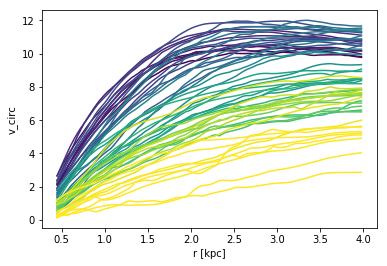

In [12]:
for i in range(1, len(tbl.columns)-2, 10):
    if str(i) in tbl.colnames:
        im = plt.plot(df['rbins'], df[str(i)].rolling(10).mean(), color=matplotlib.cm.ScalarMappable(norm=norm, cmap=None).to_rgba(i))
plt.ylabel('v_circ')
plt.xlabel('r [kpc]');

In [16]:
tbl_sb = Table.read('profiles/69p300prof_sb.fits')
df_sb = tbl_sb.to_pandas()

In [17]:
def plot_profiles(tbl, interval=5):
    df = tbl.to_pandas()
    for i in range(1, len(tbl.columns)-2, interval):
        if str(i) in tbl.colnames:
            im = plt.plot(df['rbins'], df[str(i)].rolling(20).mean(), color=matplotlib.cm.ScalarMappable(norm=norm, cmap=None).to_rgba(i))
            plt.gca().invert_yaxis()

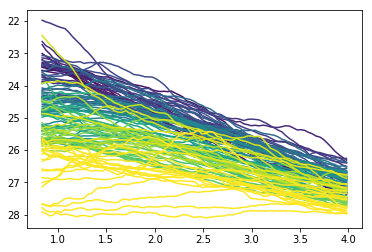

In [18]:
plot_profiles(tbl_sb)

In [14]:
tbl_l = Table.read("../ssam/m69p100/maps_data_v_w10_r200_n30.fits")

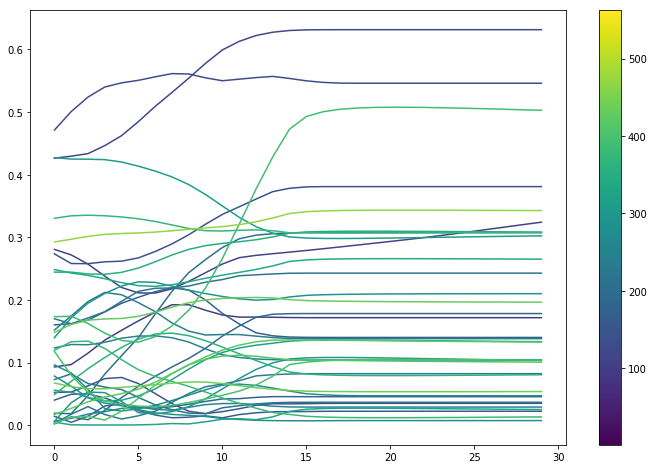

In [15]:
tbl_l['lambda_prof']
fig, ax =plt.subplots(figsize=(12, 8))
mappable = plt.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=1,vmax=563),)
# df = tbl_l.to_pandas() , df[str(i)].rolling(20).mean()
for i in range(100, len(tbl_l), 10):
    if not np.isnan(tbl_l['lambda_prof'][i][-1]):
        ax.plot(tbl_l['lambda_prof'][i], color=mappable.to_rgba(i), linewidth=None)
mappable.set_array([])
plt.colorbar(mappable)

In [16]:
def k(i):
    plt.plot(tbl_l['lambda_prof'][i], color=mappable.to_rgba(i), linewidth=None)
    plt.ylim(0, 0.8)
w = ipywidgets.interactive(k, i=sl)
w.children[-1].layout.height = '280px'
w

interactive(children=(IntSlider(value=1, description='i', max=462, min=1), Output(layout=Layout(height='280px'…

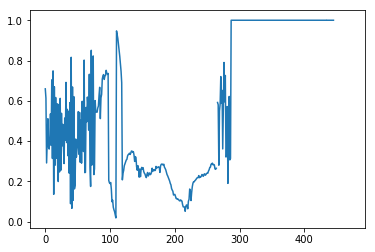

In [17]:
plt.plot(tbl_l['ellip'])

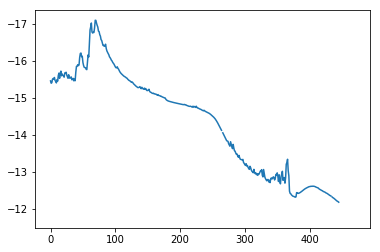

In [20]:
plt.plot(tbl_l['mag_v'])
plt.gca().invert_yaxis()

In [23]:
def k(i):
    plt.plot(df[str(i)].rolling(10).mean())
#     plt.ylim(20, 30)
w = ipywidgets.interactive(k, i=sl)
w.children[-1].layout.height = '280px'
w

interactive(children=(IntSlider(value=462, description='i', max=462, min=1), Output(layout=Layout(height='280p…

In [35]:
def k(i):
    plt.plot(df[str(i)].rolling(10).mean())
    plt.ylim(20, 30)
w = ipywidgets.interactive(k, i=sl)
w.children[-1].layout.height = '280px'
w   

interactive(children=(IntSlider(value=29, description='i', max=463, min=1), Output(layout=Layout(height='280px…